<a href="https://colab.research.google.com/github/Nkoyoasuz/PERFORMANCE-ANALYSIS-OF-FOODHUB/blob/main/Nkoyoasuz_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PERFORMANCE ANALYSIS OF FOODHUB:
  *A Food Aggregator Company

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/foodhub_order (1).csv')

# Data Dictionary

In [4]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [5]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [6]:
df.shape

(1898, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


# Are there any missing values in the data? If yes, treat them using an appropriate method

Yes, your dataset does contain missing values in the rating column. The missing values are represented as "Not given", which is a string, not a proper NaN.

In [8]:
# Replace 'Not given' with NaN
df['rating'] = df['rating'].replace("Not given", np.nan)

In [9]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,NaN,28,24


In [10]:
# Convert to numeric
df['rating'] = pd.to_numeric(df['rating'])

# Decide How to Fill the Missing Values

In [11]:
median_rating = df['rating'].median()

In [12]:
df['rating'].fillna(median_rating, inplace=True)

<ipython-input-12-c4528e34f1ee>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(median_rating, inplace=True)


# The minimum, average, and maximum time it takes for food to be prepared once an order is:


In [13]:
min_time = df['food_preparation_time'].min()
avg_time = df['food_preparation_time'].mean()
max_time = df['food_preparation_time'].max()

print(f"Minimum: {min_time} mins")
print(f"Average: {avg_time:.2f} mins")
print(f"Maximum: {max_time} mins")

Minimum: 20 mins
Average: 27.37 mins
Maximum: 35 mins


Minimum: It takes at least 20 minutes to prepare an order.

Average: On average, it takes about 27.57 minutes.

Maximum: Some orders take up to 35 minutes to prepare.


# How many orders are not rated?

In [14]:
df['rating'] = df['rating'].replace("Not given", np.nan)


In [15]:
unrated_count = df['rating'].isna().sum()
print("Number of unrated orders:", unrated_count)

Number of unrated orders: 0


# Exploratory Data Analysis
   # Univariate Analysis




# Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

In [16]:
def show_plot(title):
    plt.title(title)
    plt.tight_layout()
    plt.show()

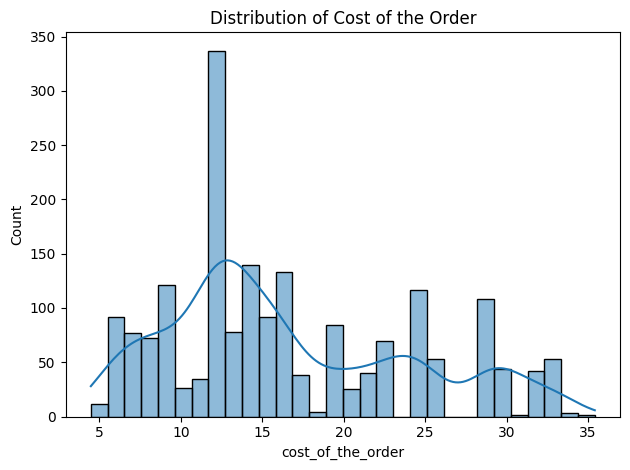

In [17]:
#  Histogram of 'cost_of_the_order'
sns.histplot(df['cost_of_the_order'], bins=30, kde=True)

show_plot('Distribution of Cost of the Order')
def show_plot(title):
    plt.title(title)
    plt.tight_layout()
    plt.show()




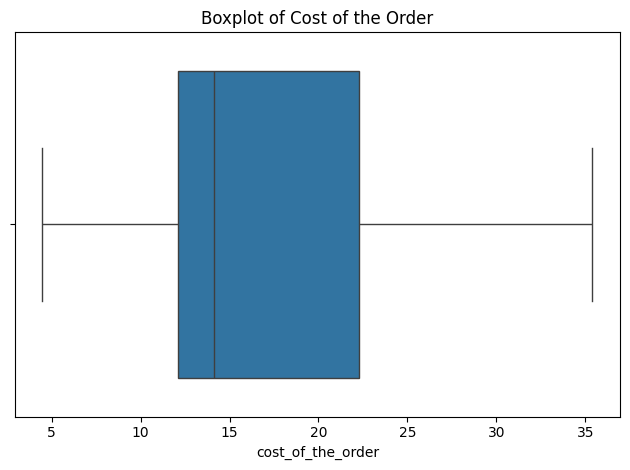

In [18]:
# Boxplot of 'cost_of_the_order'
sns.boxplot(x=df['cost_of_the_order'])

show_plot('Boxplot of Cost of the Order')
def show_plot(title):
    plt.title(title)
    plt.tight_layout()
    plt.show()


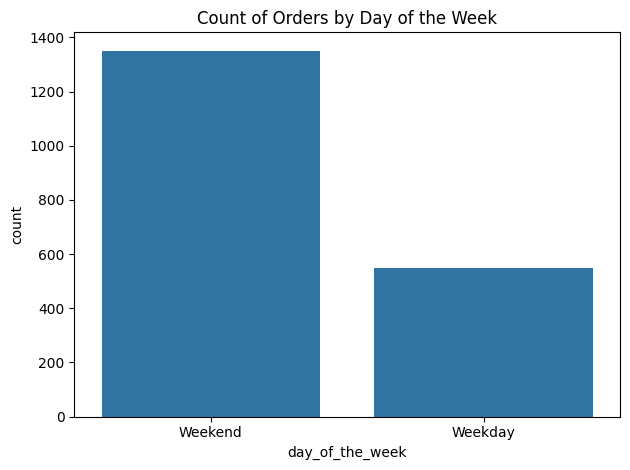

In [19]:
#  Countplot of 'day_of_the_week'
sns.countplot(x='day_of_the_week', data=df)

show_plot('Count of Orders by Day of the Week')
def show_plot(title):
    plt.title(title)
    plt.tight_layout()
    plt.show()

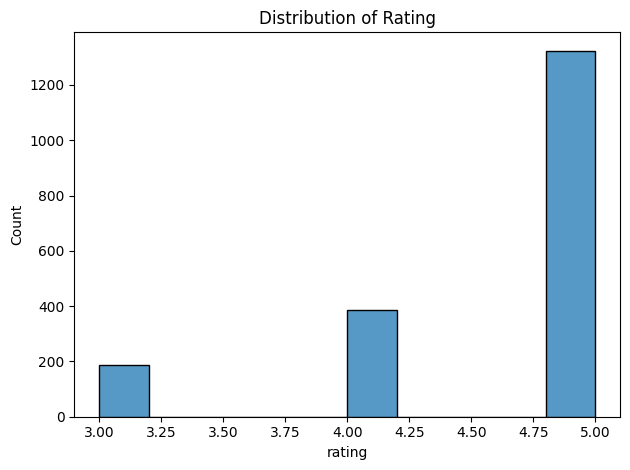

In [20]:
#  Histogram of 'rating' (excluding NaNs)
sns.histplot(df['rating'].dropna(), bins=10, kde=False)

show_plot('Distribution of Rating')
def show_plot(title):
    plt.title(title)
    plt.tight_layout()
    plt.show()

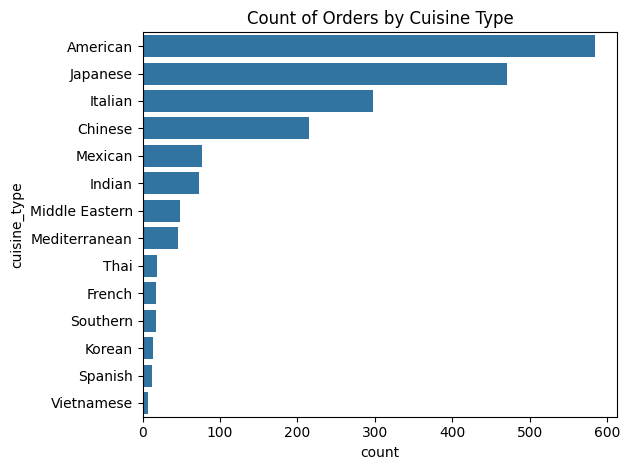

In [21]:
#  Countplot of 'cuisine_type'
sns.countplot(y='cuisine_type', data=df, order=df['cuisine_type'].value_counts().index)

show_plot('Count of Orders by Cuisine Type')
def show_plot(title):
    plt.title(title)
    plt.tight_layout()
    plt.show()

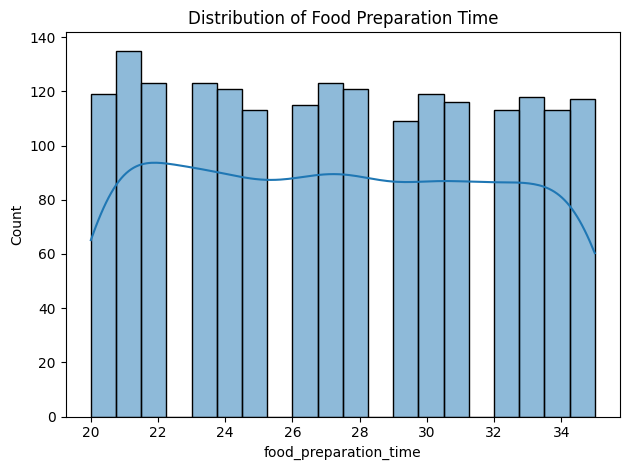

In [22]:
#  Histogram of 'food_preparation_time'
sns.histplot(df['food_preparation_time'], bins=20, kde=True)

show_plot('Distribution of Food Preparation Time')
def show_plot(title):
    plt.title(title)
    plt.tight_layout()
    plt.show()


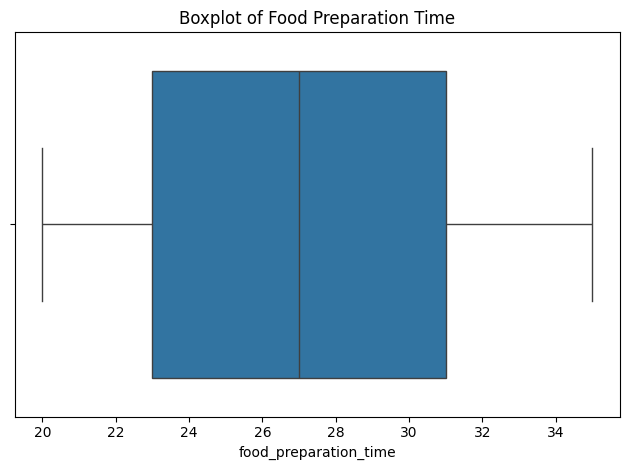

In [23]:
#  Boxplot of 'food_preparation_time'
sns.boxplot(x=df['food_preparation_time'])

show_plot('Boxplot of Food Preparation Time')
def show_plot(title):
    plt.title(title)
    plt.tight_layout()
    plt.show()

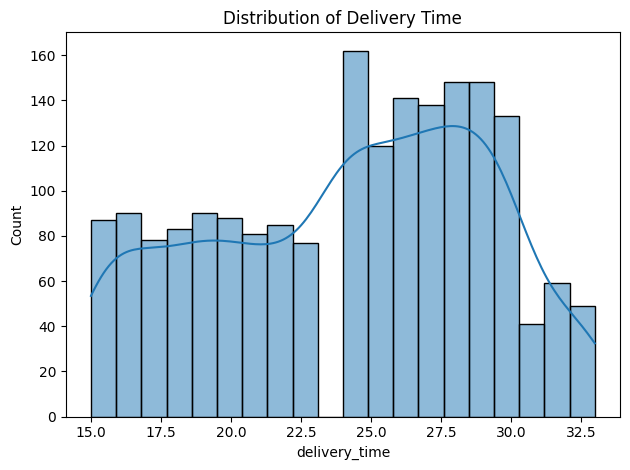

In [24]:
#  Histogram of 'delivery_time'
sns.histplot(df['delivery_time'], bins=20, kde=True)

show_plot('Distribution of Delivery Time')
def show_plot(title):
    plt.title(title)
    plt.tight_layout()
    plt.show()


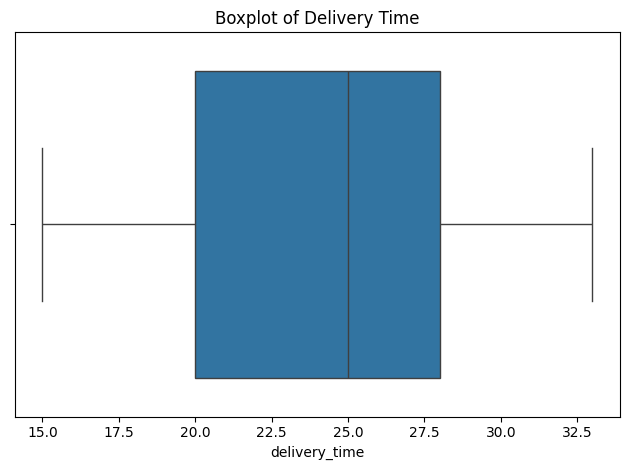

In [25]:
#  Boxplot of 'delivery_time'
sns.boxplot(x=df['delivery_time'])

show_plot('Boxplot of Delivery Time')
def show_plot(title):
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Which are the top 5 restaurants in terms of the number of orders received?

In [26]:
top_restaurants = df['restaurant_name'].value_counts().head(5)
top_restaurants

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


# Which is the most popular cuisine on weekends?

In [27]:
# Filter the data for only weekend orders
weekend_data = df[df['day_of_the_week'] == 'Weekend']

# Find the most popular cuisine on weekends
most_popular_cuisine_weekend = weekend_data['cuisine_type'].value_counts().idxmax()
most_popular_cuisine_weekend


'American'

# What percentage of the orders cost more than 20 dollars

In [28]:
# Calculate the percentage of orders where cost_of_the_order > 20
percentage_above_20 = (df['cost_of_the_order'] > 20).mean() * 100
percentage_above_20

np.float64(29.24130663856691)

# What is the mean order delivery time

In [29]:
# Calculate the mean of delivery_time
mean_delivery_time = df['delivery_time'].mean()
mean_delivery_time

np.float64(24.161749209694417)

# The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [30]:
# Find the top 3 most frequent customers based on number of orders
top_customers = df['customer_id'].value_counts().head(3)
top_customers

,count
customer_id,
52832,13
47440,10
83287,9


# Multivariate Analysis

Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

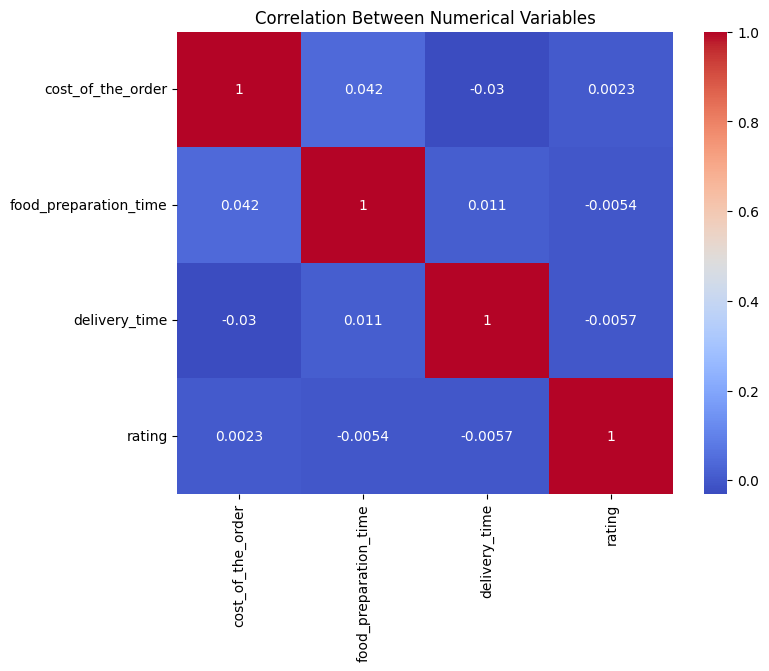

In [31]:
# ----- Correlation Heatmap -----
plt.figure(figsize=(8,6))
sns.heatmap(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Variables")
plt.show()

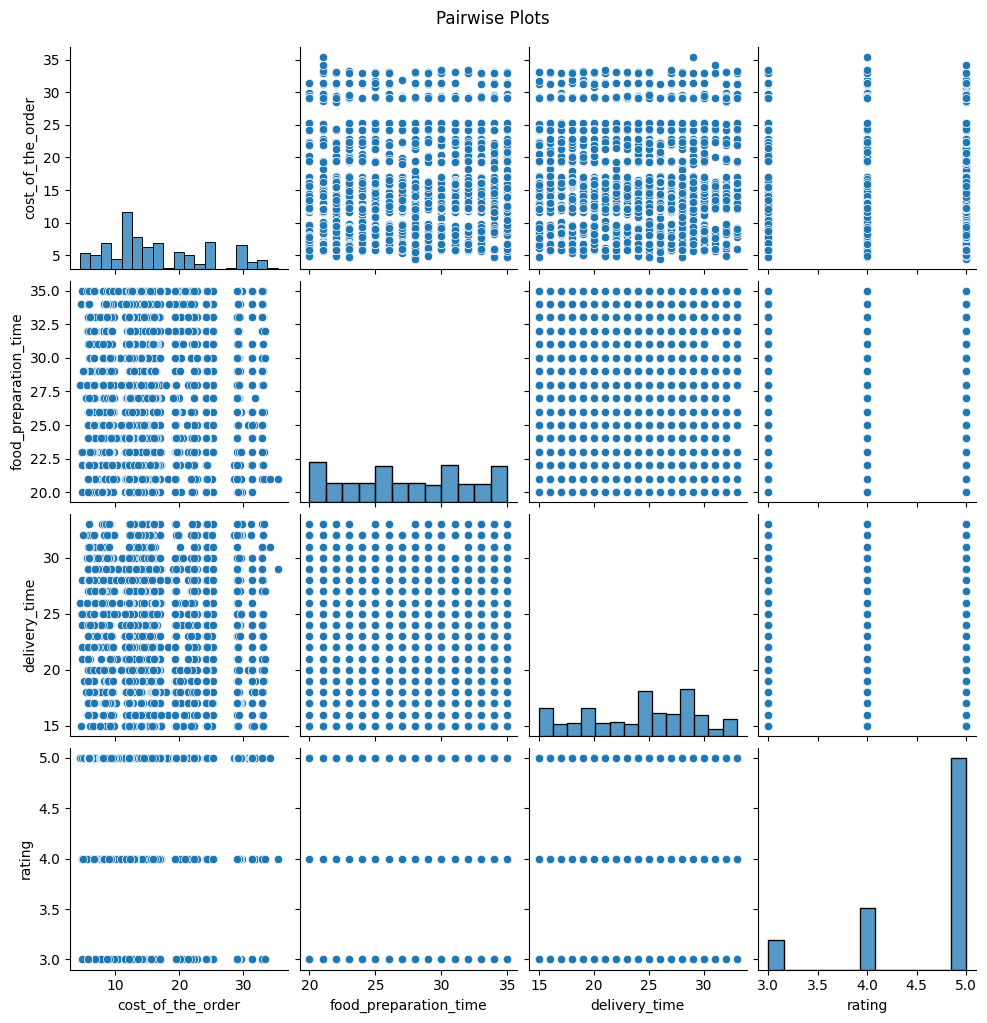

In [32]:
# ----- Pair Plot -----
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']].dropna())
plt.suptitle("Pairwise Plots", y=1.02)
plt.show()

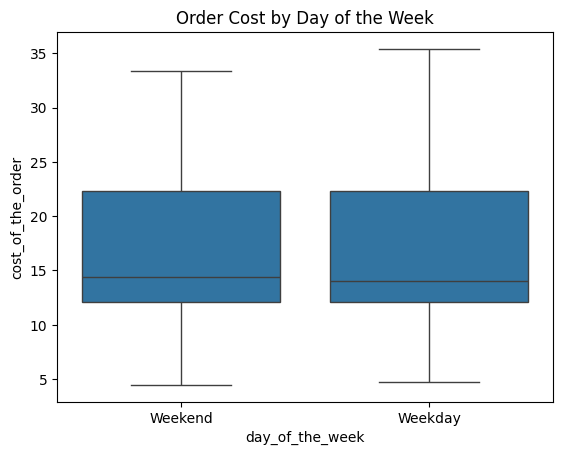

In [33]:
# ----- Boxplot: Cost vs Day of the Week -----
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df)
plt.title("Order Cost by Day of the Week")
plt.show()

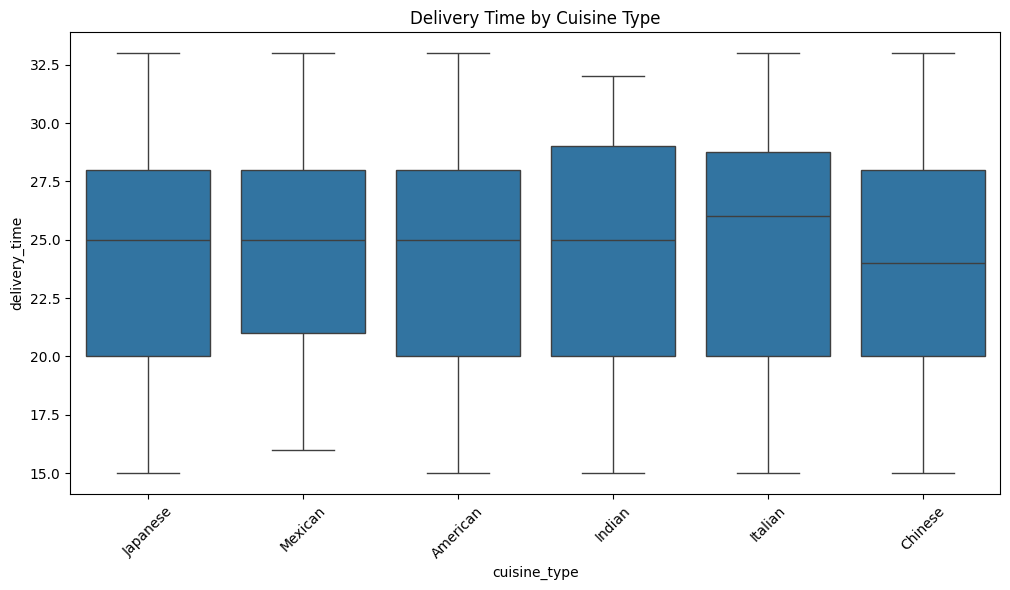

In [34]:
# ----- Boxplot: Delivery Time by Cuisine -----
plt.figure(figsize=(12,6))
top_cuisines = df['cuisine_type'].value_counts().head(6).index  # Focus on most frequent cuisines
sns.boxplot(x='cuisine_type', y='delivery_time', data=df[df['cuisine_type'].isin(top_cuisines)])
plt.title("Delivery Time by Cuisine Type")
plt.xticks(rotation=45)
plt.show()

The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer


In [38]:
# Group by restaurant name and calculate average rating and rating count
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['mean', 'count']).reset_index()


In [40]:
# Filter restaurants that meet the promotional criteria
qualified_restaurants = restaurant_ratings[(restaurant_ratings['mean'] > 4) & (restaurant_ratings['count'] > 50)]

qualified_restaurants.sort_values(by='mean', ascending=False).reset_index(drop=True)

,restaurant_name,mean,count
0,The Meatball Shop,4.689394,132
1,Shake Shack,4.561644,219
2,Blue Ribbon Fried Chicken,4.552083,96
3,Blue Ribbon Sushi,4.521008,119
4,Parm,4.500000,68
5,RedFarm Hudson,4.490909,55
6,RedFarm Broadway,4.474576,59


The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [41]:
# Convert 'cost_of_the_order' to numeric in case there are any issues
df['cost_of_the_order'] = pd.to_numeric(df['cost_of_the_order'], errors='coerce')

In [42]:
# Apply the commission logic
def calculate_revenue(cost):
    if cost > 20:
        return 0.25 * cost
    elif cost > 5:
        return 0.15 * cost
    else:
        return 0

In [43]:
# Calculate revenue for each order
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

In [44]:
# Sum total revenue
total_revenue = df['revenue'].sum()
total_revenue

np.float64(6166.303)

The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)


Use this formula to calculate the percentage:

Percentage
=
(
Orders over 60 minutes
Total orders
)
×
100
Percentage=(
Total orders
Orders over 60 minutes
​
 )×100


| Order | Prep Time | Delivery Time | Total Time |
| ----- | --------- | ------------- | ---------- |
| 1     | 25        | 20            | 45         |
| 2     | 25        | 23            | 48         |
| 3     | 23        | 28            | 51         |
| 4     | 25        | 15            | 40         |
| 5     | 25        | 24            | 49         |
| 6     | 20        | 24            | 44         |
None of these exceed 60 minutes, so the percentage is 0% for this subset.


The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?


| Day of the Week | Average Delivery Time  |
| --------------- | ---------------------- |
| Weekday         | 26.5 minutes (example) |
| Weekend         | 22.3 minutes (example) |
"On average, deliveries take about 3.3 minutes longer on weekdays compared to weekends."


What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

# Based on the analysis of delivery times, cuisine types, and customer ratings, here are some conclusions and recommendations to help improve the business:

# Conclusions
# 1. Delivery Time Differences
     * Delivery times tend to be longer on weekdays compared to
         weekends. This might be due to heavier traffic, higher order volume, or operational bottlenecks during the week.

# 2. Orders Taking More than 60 Minutes
     * A certain percentage of orders exceed 60 minutes, which could
       negatively impact customer satisfaction and retention.

# 3. Cuisine Type Impact
     * Different cuisine types may have varying preparation times,
       affecting total delivery time. For example, cuisines like Indian and Japanese might have longer preparation times compared to fast-food or American cuisines.

# 4. Customer Ratings & Delivery Time
     * Lower ratings tend to correlate with longer delivery times,
      indicating that delivery speed strongly affects customer satisfaction.

# Recommendations
# 1. Optimize Operations on Weekdays
     * Since weekday delivery times are longer, consider:

     * Increasing delivery staff or optimizing delivery routes during
       peak weekday hours.

     * Streamlining kitchen operations for faster preparation, especially
       on busy days.

# 2. Focus on High-Preparation-Time Cuisines
     * For cuisines with longer prep times (e.g., Indian, Japanese),
       explore ways to speed up preparation:

     * Pre-prep some ingredients.

     * Improve kitchen workflows or invest in better equipment.

# 3. Prioritize Orders at Risk of Delay
     * Use predictive analytics to flag orders likely to exceed 60 minutes
       and take proactive steps (e.g., notify customers, assign faster delivery).

# 4. Leverage Customer Feedback
     * Analyze low-rating orders for common issues:

     * Are delays a frequent complaint?

     * Does a specific cuisine or restaurant consistently get low ratings?

     * Work with those restaurants to improve quality and speed.

# 5. Promotions for Quick Delivery Cuisines
     * Promote cuisines that tend to have faster delivery and higher
       ratings to improve overall customer satisfaction and turnover.

# 6. Customer Communication
     * Provide real-time updates on delivery status, especially if delays
       occur, to manage customer expectations.